## Installations

In [ ]:
#pip install opencv-contrib-python

In [ ]:
#!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [ ]:
#pip install openpyxl

In [ ]:
pip install facenet-pytorch --quiet

     |████████████████████████████████| 1.9MB 31.8MB/s 


## Imports

In [ ]:
import sys
import numpy as np
import moviepy.editor as mp
import cv2
import time
import dlib
import os
from google.colab import drive
import os.path
from os import path
from __future__ import print_function
import matplotlib.pyplot as plt
from pathlib import Path
from facenet_pytorch import MTCNN
import torch
import glob
from openpyxl import Workbook
from openpyxl import load_workbook
from keras.models import load_model
import datetime
import moviepy.editor
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

from PIL import Image, ImageDraw
from IPython import display
from datetime import timedelta
#from matplotlib import pyplot as plt
import statistics
from skimage.filters import threshold_otsu
import scipy

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3981312/45929032 bytes (8.7%)7880704/45929032 bytes (17.2%)11919360/45929032 bytes (26.0%)15507456/45929032 bytes (33.8%)19005440/45929032 bytes (41.4%)22855680/45929032 bytes (49.8%)26542080/45929032 bytes (57.8%)30334976/45929032 bytes (66.0%)34316288/45929032 bytes (74.7%)38166528/45929032 bytes (83.1%)42115072/45929032 bytes (91.7%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [ ]:
pip list

Package                       Version            
----------------------------- -------------------
absl-py                       0.12.0             
alabaster                     0.7.12             
albumentations                0.1.12             
altair                        4.1.0              
appdirs                       1.4.4              
argon2-cffi                   20.1.0             
arviz                         0.11.2             
astor                         0.8.1              
astropy                       4.2.1              
astunparse                    1.6.3              
async-generator               1.10               
atari-py                      0.2.9              
atomicwrites                  1.4.0              
attrs                         21.2.0             
audioread                     2.1.9              
autograd                      1.3                
Babel                         2.9.1              
backcall                      0.2.0              


## CUI Controller

In [ ]:
def CUI(MainFile,Stabilize,Video_Compression,
        Face_Extract,Lip_Extraction,Frquency_Calculation,
        SMOOTHING_RADIUS,threshold,thresh_iterations,visual_area,
        disp,correctionFactor_Face,correctionFactor_Lip,save_in_excel,time_slice):
  #Call Stabilization
  print("Stabilization = {},Video_Compression = {},Face_Extraction = {},Lip_Extraction = {},Frquency_Calculation = {}".format(Stabilize,Video_Compression,Face_Extract,Lip_Extraction,Frquency_Calculation))
  print("\n")
  if (Stabilize == True):
    New_FileName = MainFile.split(".")[0] + "_Stabilized.mp4"
    print("Starting Video Stabilization..\n")
    if (path.exists(New_FileName)):
      print("Removing existing file...")
      os.remove(New_FileName)
    if (path.exists(MainFile)):
      Filename = MainFile
    else:
      print("File Not Found")  
    Stabilization(Filename, New_FileName,SMOOTHING_RADIUS)
    print("Video Stabilization Done..\n")

  #Call Video Compression
  if (Video_Compression == True):
    print("\n")
    print("Starting Video Compression..\n")
    New_FileName = MainFile.split(".")[0] + "_Compressed.mp4"
    if (path.exists(New_FileName)):
      print("Removing existing file...")
      os.remove(New_FileName)
    if (path.exists(MainFile.split(".")[0] + "_Stabilized.mp4")):
      Filename = MainFile.split(".")[0] + "_Stabilized.mp4"  
    else:
      Filename = MainFile    
    VideoCompression(Filename, New_FileName)
    print("Video Compression Done..\n")

  #Call Face Extraction
  if (Face_Extract == True):
    print("\n")
    correctionFactor = 50 
    print("Starting Face Extraction...\n")
    New_FileName = MainFile.split(".")[0] + "_FaceDetector.mp4"
    if (path.exists(New_FileName)):
      print("Removing existing file...")
      os.remove(New_FileName)
    if (path.exists(MainFile.split(".")[0] + "_Compressed.mp4")):
      Filename = MainFile.split(".")[0] + "_Compressed.mp4" 
    elif (path.exists(MainFile.split(".")[0] + "_Stabilized.mp4")):
      Filename = MainFile.split(".")[0] + "_Stabilized.mp4"
    else:
      Filename = MainFile      
    FaceExtraction(Filename, New_FileName, correctionFactor_Face)
    print("Face Extraction Done...\n")

  #Call Lip Extraction
  if (Lip_Extraction == True):
    print("\n")
    print("Starting Lip Extraction..\n")
    New_FileName = MainFile.split(".")[0] + "_LipDetector.mp4"
    if (path.exists(New_FileName)):
      print("Removing existing file...")
      os.remove(New_FileName)
    if (path.exists(MainFile.split(".")[0] + "_FaceDetector.mp4")):
      Filename = MainFile.split(".")[0] + "_FaceDetector.mp4" 
    elif (path.exists(MainFile.split(".")[0] + "_Compressed.mp4")):
      Filename = MainFile.split(".")[0] + "_Compressed.mp4"
    elif (path.exists(MainFile.split(".")[0] + "_Stabilized.mp4")):
      Filename = MainFile.split(".")[0] + "_Stabilized.mp4"
    else:
      Filename = MainFile    
    LipExtraction(Filename, New_FileName, correctionFactor_Lip)  
    print("Lip Extraction Done..\n")

  #Call Frequency Calculation
  if (Frquency_Calculation == True):
    print("###############Frequency Calculation####################\n")
    if (path.exists(MainFile.split(".")[0] + "_LipDetector.mp4")):
      Filename = MainFile.split(".")[0] + "_LipDetector.mp4"   
    elif (path.exists(MainFile.split(".")[0] + "_FaceDetector.mp4")):
      Filename = MainFile.split(".")[0] + "_FaceDetector.mp4"  
    frequency_total,errors,sweeps_mode,sweeps_mean,stdev,fps,time_slice = FrequencyCalculation(Filename,threshold,
                                                                                    thresh_iterations, 
                                                                                    visual_area, disp, 
                                                                                    time_slice) 
    
    if (save_in_excel == True):
      timestamp = datetime.datetime.now() 
      time_mode = (sweeps_mode/fps)*100
      time_mean = (sweeps_mean/fps)*100
      excelUpadter(timestamp,Filename,time_slice,frequency_total,errors,sweeps_mode,time_mode,sweeps_mean,time_mean,stdev)
    print("#############Frequency Calcualtion Ends###############\n")

## GUI Controller

In [ ]:
def GUI(MainFile,SMOOTHING_RADIUS,threshold,thresh_iterations,visual_area,disp,correctionFactor_Face,correctionFactor_Lip):
  #import tkMessageBox
  import os
  import time
  import sys
  import matplotlib
  matplotlib.use('Agg')
  import tkinter as tk     
  top = tk.Tk()
  #top.get_themes()
  #top.set_themes("clearlooks")
  top.title("Tongue Frequency Calculator")
  #my_canvas = tk.Canvas(top, width = 500, height = 500)
  canvas_width = 500
  canvas_height = 10
  w = tk.Canvas(top, 
            width=canvas_width,
            height=canvas_height)
  w.pack()
  background_image = tk.PhotoImage(file="img1.png")
  background_label = tk.Label(top, image=background_image)
  background_label.place(relwidth=1, relheight=1)

  def callStabilize():
    print("\nStarting Video Stabilization..\n")
    if (path.exists("video.mp4")):
      Filename = "video.mp4"
      New_FileName = "Stabilized.mp4"
    else:
      print("File Not Found")  
    Stabilization(Filename, New_FileName,SMOOTHING_RADIUS)
    #os.system('python Module_2-VideoStabilization.py video.mp4')
    print("Video Stabilization over..\n\n")

  def callCompress():
    print("\nStarting Video Compression..\n")
    New_FileName = "Compressed.mp4"
    if (path.exists("Stabilized.mp4")):
      Filename = "Stabilized.mp4"  
    else:
      Filename = MainFile   
    VideoCompression(Filename, New_FileName)
    #os.system('python Module_1-VideoCompression.py stabilized_video_out.mp4 1280 720')
    print("Video Compression over..\n\n")

  def callFaceDetect():
    print("\nStarting Face Detection..\n")
    New_FileName = "FaceDetector.mp4"
    if (path.exists(New_FileName)):
      os.remove(New_FileName)
    if (path.exists("Compressed.mp4")):
      Filename = "Compressed.mp4" 
    elif (path.exists("Stabilized.mp4")):
      Filename = "Stabilized.mp4"
    else:
      Filename = MainFile    
    FaceExtraction(Filename, New_FileName, correctionFactor_Face) 
    #os.system('python  Module_3-LipExtraction_v3.py')
    print("Face Detection over..\n\n")
  
  def callLipExtraction():
    print("\nStarting Lip Extraction..\n")
    New_FileName = "LipDetector.mp4"
    if (path.exists(New_FileName)):
      os.remove(New_FileName)
    if (path.exists("FaceDetector.mp4")):
      Filename = "FaceDetector.mp4" 
    elif (path.exists("Compressed.mp4")):
      Filename = "Compressed.mp4"
    elif (path.exists("Stabilized.mp4")):
      Filename = "Stabilized.mp4"
    #correctionFactor = 50
    LipExtraction(Filename, New_FileName, correctionFactor_Lip)  
    #os.system('python Module_3-LipExtraction.py')
    print("Lip Extraction over..\n\n")

    
  def callTongueTrack():
    print("\nStarting Frequency Calculation..\n")
    if (path.exists("LipDetector.mp4")):
      Filename = "LipDetector.mp4"   
    elif (path.exists("FaceDetector.mp4")):
      Filename = "FaceDetector.mp4"  
    FrequencyCalculation(Filename,threshold,thresh_iterations, disp, visual_area)  
    #os.system('python Module_4-TongeTracking.py OutputVideo/1.mp4')
    print("Frequency Calculation over..\n\n")
    
  def callCalculateSpeed():
    print("Starting to Calculate Speed..\n")
    #os.system('python Module_5-FrquencyCalculation.py OutputVideo/2.mp4')
    print("Speed Calculation Done..\n\n")

  def callPerformAll():
    print("Starting....\n")
    CUI(MainFile,True,True,True,True,True,SMOOTHING_RADIUS,threshold,thresh_iterations,visual_area,disp,correctionFactor_Face,correctionFactor_Lip)
    #os.system('python Controller')
    print("Done!\n\n")

  B1 = tk.Button(top, text ="Stabilize", command = callStabilize, height=5, width = 35)
  B2 = tk.Button(top, text ="Compress", command = callCompress, height=5, width = 35)
  B3 = tk.Button(top, text ="Face Extraction", command = callFaceDetect, height=5, width = 35)
  B4 = tk.Button(top, text ="Lip Extraction", command = callLipExtraction, height=5, width = 35)
  B5 = tk.Button(top, text ="Calculate Frequency", command = callTongueTrack, height=5, width = 35)
  B6 = tk.Button(top, text ="Calculate Speed", command = callTongueTrack, height=5, width = 35)
  B7 = tk.Button(top, text ="Perform All", command = callPerformAll, height=5, width = 35)
  B1.pack(side = tk.LEFT)
  B2.pack(side = tk.RIGHT)
  B3.pack(side = tk.TOP)
  B4.pack(side = tk.TOP)
  B5.pack(side = tk.BOTTOM)
  B6.pack(side = tk.BOTTOM)
  B7.pack(side = tk.BOTTOM)

  top.mainloop()

 ## Helper Functions

In [ ]:
def make_square(img):
    IMAGE_SIZE = 256
    im = Image.fromarray(img)
    fill_color=(0, 0, 0, 0)
    min_size=IMAGE_SIZE
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    open_cv_image = np.array(new_im) 
    # Convert RGB to BGR 
    #print(open_cv_image.shape)
    #open_cv_image = open_cv_image[:, :, ::-1].copy() 
    #print(open_cv_image.shape)
    i =  cv2.resize(open_cv_image,(256,256),interpolation = cv2.INTER_CUBIC)
    #print("Final Output:",i.shape)
    return i

In [ ]:
def mask_parse(mask):
    mask = np.squeeze(mask)
    mask = [mask, mask, mask]
    mask = np.transpose(mask, (1, 2, 0))
    return mask

In [ ]:
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

# Resizing the Image
def resizer (pic, newsize):
  lx, ly = int(newsize[0]), int(newsize[1])
  if lx > pic.shape[1] or ly > pic.shape[0]:
      # For upsizing use linear for good quality & decent speed
      interpolation = cv2.INTER_LINEAR
  else:
      # For dowsizing use area to prevent aliasing
      interpolation = cv2.INTER_AREA
  return cv2.resize(+pic.astype('uint8'), (lx, ly),
                    interpolation=interpolation) 

# Calculating Moving Average
def movingAverage(curve, radius): 
  window_size = 2 * radius + 1
  # Define the filter 
  f = np.ones(window_size)/window_size 
  # Add padding to the boundaries 
  curve_pad = np.lib.pad(curve, (radius, radius), 'edge') 
  # Apply convolution 
  curve_smoothed = np.convolve(curve_pad, f, mode='same') 
  # Remove padding 
  curve_smoothed = curve_smoothed[radius:-radius]
  # return smoothed curve
  return curve_smoothed     

# Calculating the smooth trajectory
def smooth(trajectory): 
  smoothed_trajectory = np.copy(trajectory) 
  # Filter the x, y and angle curves
  for i in range(3):
    smoothed_trajectory[:,i] = movingAverage(trajectory[:,i], radius=SMOOTHING_RADIUS)

  return smoothed_trajectory


def fixBorder(frame):
  s = frame.shape
  # Scale the image 4% without moving the center
  T = cv2.getRotationMatrix2D((s[1]/2, s[0]/2), 0, 1.04)
  frame = cv2.warpAffine(frame, T, (s[1], s[0]))
  return frame

In [ ]:
def draw_flow(img, flow, step=10):   
    #from the beginning to position 2 (excluded channel info at position 3)
    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    fx, fy = flow[y,x].T
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(vis, lines, 0, (0, 255, 0))
    for (x1, y1), (x2, y2) in lines:
        cv2.circle(vis, (x1, y1), 2, (0, 255, 0), -1)
    return vis

def draw_hsv(flow):
    (h, w) = flow.shape[:2]
    (fx, fy) = (flow[:, :, 0], flow[:, :, 1])
    ang = np.arctan2(fy, fx) + np.pi
    v = np.sqrt(fx * fx + fy * fy)
    hsv = np.zeros((h, w, 3), np.uint8)
    hsv[..., 0] = ang * (180 / np.pi / 2)
    hsv[..., 1] = 0xFF
    hsv[..., 2] = np.minimum(v * 4, 0xFF)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    #cv2.imshow('hsv', bgr)
    return bgr   

def warp_flow(img, flow):
    (h, w) = flow.shape[:2]
    flow = -flow
    flow[:, :, 0] += np.arange(w)
    flow[:, :, 1] += np.arange(h)[:, np.newaxis]
    res = cv2.remap(img, flow, None, cv2.INTER_LINEAR)
    return res

In [ ]:
def excelUpadter(timestamp,filename,time_slice,frequency_total,errors,sweeps_mode,time_mode,sweeps_mean,time_mean,stdev):
  ExcelFile="Frequency.xlsx"
  
  workbook = load_workbook(ExcelFile)
  #workbook.sheetnames
  sheet = workbook.active
  
  max_column=sheet.max_column
  max_row=sheet.max_row  
  #print(sheet.cell(row=1, column=1).value)
  sheet.cell(row=max_row+1, column=1).value = timestamp
  sheet.cell(row=max_row+1, column=2).value = filename.split("_")[0]
  sheet.cell(row=max_row+1, column=3).value = time_slice
  sheet.cell(row=max_row+1, column=4).value = frequency_total
  sheet.cell(row=max_row+1, column=5).value = errors 
  sheet.cell(row=max_row+1, column=6).value = sweeps_mode
  sheet.cell(row=max_row+1, column=7).value = sweeps_mean
  sheet.cell(row=max_row+1, column=8).value = time_mode
  sheet.cell(row=max_row+1, column=9).value = time_mean
  sheet.cell(row=max_row+1, column=10).value = stdev
  #print(sheet.cell(row=1, column=1).value)


  workbook.save(ExcelFile)

## Module 1 - Stabilization

In [ ]:
#Module 1 - Stabilization
def Stabilization(Filename, New_Filename):
  print("Input File name : ", Filename)  
  print("Ouput File name : ", New_Filename)
  # Read input video
  cap = cv2.VideoCapture(Filename) 

  # Get frame count
  n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 
    
  # Get width and height of video stream
  w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
  h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

  # Get frames per second (fps)
  fps = cap.get(cv2.CAP_PROP_FPS)
    
  # Define the codec for output video
  fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    
  # Set up output video
  out = cv2.VideoWriter(New_Filename, fourcc, fps, (w, h))

  # Read first frame
  _, prev = cap.read() 
    
  # Convert frame to grayscale
  prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY) 

  # Pre-define transformation-store array
  transforms = np.zeros((n_frames-1, 3), np.float32) 
  #sys.stdout.write('['+' '*(n_frames-2)+']')
  sys.stdout.write('['+' '*(100-2)+']')
  # moved *11 on account of ]
  sys.stdout.write('\b'*(100-1))
  sys.stdout.flush()
  x = int(n_frames / 100)
  for i in range(n_frames-2):
    # Detect feature points in previous frame
    prev_pts = cv2.goodFeaturesToTrack(prev_gray,
                                        maxCorners=200,
                                        qualityLevel=0.01,
                                        minDistance=30,
                                        blockSize=3)
      
    # Read next frame
    success, curr = cap.read() 
    if not success: 
      break 

    # Convert to grayscale
    curr_gray = cv2.cvtColor(curr, cv2.COLOR_BGR2GRAY) 

    # Calculate optical flow (i.e. track feature points)
    curr_pts, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, curr_gray, prev_pts, None) 

    # Sanity check
    assert prev_pts.shape == curr_pts.shape 

    # Filter only valid points
    idx = np.where(status==1)[0]
    prev_pts = prev_pts[idx]
    curr_pts = curr_pts[idx]

    #Find transformation matrix
    #m = cv2.estimateRigidTransform(prev_pts, curr_pts, fullAffine=False) #will only work with OpenCV-3 or less
    m = cv2.estimateAffinePartial2D(prev_pts, curr_pts)[0] 
    #print(m.shape())
    #print(m)
    # Extract traslation
    dx = m[0,2]
    dy = m[1,2]

    # Extract rotation angle
    da = np.arctan2(m[1,0], m[0,0])
      
    # Store transformation
    transforms[i] = [dx,dy,da]
      
    # Move to next frame
    prev_gray = curr_gray

    #print("Frame: " + str(i) +  "/" + str(n_frames) + " -  Tracked points : " + str(len(prev_pts)))
    #print("Stabilzed : ", int(((i+1)/n_frames)*100), "%")
    #time.sleep(0.1)
    if (i % x == 0):
      sys.stdout.write('#')
      sys.stdout.flush()
  #sys.stdout.write('] Stabilization Completed!\n')  
  #print("Stabilzed : ", int(((i+2)/n_frames)*100), "%")
  #print("Stabilzed : ", ((i+3)/n_frames)*100, "%")
  # Compute trajectory using cumulative sum of transformations
  trajectory = np.cumsum(transforms, axis=0) 
    
  # Create variable to store smoothed trajectory
  smoothed_trajectory = smooth(trajectory) 

  # Calculate difference in smoothed_trajectory and trajectory
  difference = smoothed_trajectory - trajectory
    
  # Calculate newer transformation array
  transforms_smooth = transforms + difference

  # Reset stream to first frame 
  cap.set(cv2.CAP_PROP_POS_FRAMES, 0) 
    
  # Write n_frames-1 transformed frames
  for i in range(n_frames-2):
    # Read next frame
    success, frame = cap.read() 
    if not success:
      break

    # Extract transformations from the new transformation array
    dx = transforms_smooth[i,0]
    dy = transforms_smooth[i,1]
    da = transforms_smooth[i,2]

    # Reconstruct transformation matrix accordingly to new values
    m = np.zeros((2,3), np.float32)
    m[0,0] = np.cos(da)
    m[0,1] = -np.sin(da)
    m[1,0] = np.sin(da)
    m[1,1] = np.cos(da)
    m[0,2] = dx
    m[1,2] = dy

    # Apply affine wrapping to the given frame
    frame_stabilized = cv2.warpAffine(frame, m, (w,h))

    # Fix border artifacts
    frame_stabilized = fixBorder(frame_stabilized) 
    frame_out = frame_stabilized
    # Write the frame to the file
    # frame_out = cv2.hconcat([frame, frame_stabilized])
       
    # If the image is too big, resize it.
    #if(frame_out.shape[1] > 1920): 
      #frame_out = cv2.resize(frame_out, (int(frame_out.shape[1]/2), int(frame_out.shape[0]/2)))
    
    #cv2.imshow("Before and After", frame_out)
    cv2.waitKey(10)
    out.write(frame_out)
  sys.stdout.write('] 100%!\n') 
  # Release video
  cap.release()
  out.release()

## Module 2 - Video Compression

In [ ]:
#Module 2 - Video Compression
def VideoCompression(Filename, New_Filename):
  print("Input File name : ", Filename)  
  print("Ouput File name : ", New_Filename)
  try :
      h=Height_Vid
      w=Width_Vid
      filename = Filename
      clip = mp.VideoFileClip(filename)
      clip_resized = clip.resize((h,w))
      clip_resized.write_videofile(New_Filename)
  except :
          # TRY USING OPENCV
          try:
              def resizer (pic, newsize):
                  lx, ly = int(newsize[0]), int(newsize[1])
                  if lx > pic.shape[1] or ly > pic.shape[0]:
                      # For upsizing use linear for good quality & decent speed
                      interpolation = cv2.INTER_LINEAR
                  else:
                      # For dowsizing use area to prevent aliasing
                      interpolation = cv2.INTER_AREA
                  return cv2.resize(+pic.astype('uint8'), (lx, ly),
                                    interpolation=interpolation) 
              cap = cv2.VideoCapture(Filename)
              w=Width_Vid
              h=Height_Vid
              fps = cap.get(cv2.CAP_PROP_FPS)

              # Define the codec for output video
              fourcc = cv2.VideoWriter_fourcc(*'MJPG')

              # Set up output video
              out = cv2.VideoWriter(New_Filename, fourcc, fps, (h, w))

              n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 

              for i in range(n_frames-2):
                  success, frame = cap.read() 
                  if not success:
                      break

                  out.write(resizer(frame,(h,w)))
              cap.release()
              out.release()
              # Close windows
              cv2.destroyAllWindows()
          except :
              resize_possible = False
              print("Please install either OpenCV or moviepy Editior ")

## Module 3 - Face Extraction

In [ ]:
def FaceExtraction(Filename, New_Filename, correctionFactor):    
  print("Input File name : ", Filename)  
  print("Ouput File name : ", New_Filename)
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

  print('Running on device: {}'.format(device))
  mtcnn = MTCNN(margin=40,select_largest=False, post_process=False, device=device)

  cap = cv2.VideoCapture(Filename)
  fps = cap.get(cv2.CAP_PROP_FPS)
  Y1 = Y2 = X1 = X2 = 0

  n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 
  frames = []
  c = 0
  for i in range(n_frames):
      success, frame = cap.read() 
      if not success:
        break
      # Add to batch
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
      #print('\rTracking frame: {}'.format(i + 1), end='')

      # Detect faces
      boxes, prob ,landmarks = mtcnn.detect(frame ,landmarks=True)
      #faces = mtcnn(frame)
      #print(boxes)
      if (boxes is None):
          True
      else:
          c = c + 1

          #print("Landmarks :   ",i," : ")
          #print(landmarks)
          #print("\n")
          x1_f = int(boxes[0][0])
          y1_f = int(boxes[0][1])
          w = int(boxes[0][2])
          h = int(boxes[0][3])
          
          #print(y1_f,y2_f,x1_f,x2_f)
          #print(y1,y2,x1,x2)
          #crop_face = frame[y1_f:h,x1_f:w]
          #print(y1_f,h,x1_f,w)
          Y1 = Y1 + y1_f
          Y2 = Y2 + h
          X1 = X1 + x1_f
          X2 = X2 + w

  cf = correctionFactor 
  if (c == 0): Y1_avg=Y2_avg=X1_avg=X2_avg=0
  else:
    Y1_avg = int(Y1/c)
    Y2_avg = int(Y2/c)
    X1_avg = int(X1/c)
    X2_avg = int(X2/c)

  if (Y1_avg-cf < 1) : Y1_avg = cf
  if (Y2_avg < 1) : Y2_avg = 0
  if (X1_avg-cf < 1) : X1_avg = cf
  if (X2_avg < 1) : X2_avg = 0


  print(Y1_avg,Y2_avg,X1_avg,X2_avg,c)
  cap2 = cv2.VideoCapture(Filename)
  
  w = int((cap2.get(cv2.CAP_PROP_FRAME_WIDTH))*.5)
  h = int((cap2.get(cv2.CAP_PROP_FRAME_HEIGHT))*.75)
  fps = cap2.get(cv2.CAP_PROP_FPS)
  # Define the codec for output video
  fourcc = cv2.VideoWriter_fourcc(*'MJPG')
  # Set up output video
  out = cv2.VideoWriter(New_Filename, fourcc, fps, (w, h))
  shape=w,h
  while True:
      success, frame = cap2.read()
      if (success):
        #print(w,h)
        crop_img = frame[Y1_avg-cf:Y2_avg+cf, X1_avg-cf:X2_avg+cf]
        cv2.waitKey(10)
        out.write(cv2.resize(crop_img,shape))
      else:
        break   
  # Close windows
  cap2.release()
  cap.release()
  #cv2.destroyAllWindows()
  out.release()

## Module 4 - Lip Extraction

In [ ]:
def LipExtraction(Filename, New_Filename, correctionFactor):
  print("Input File name : ", Filename)    
  print("Ouput File name : ", New_Filename) 
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  cf = correctionFactor
  print('Running on device: {}'.format(device))
  mtcnn = MTCNN(margin=40,select_largest=False, post_process=False, device=device)

  cap = cv2.VideoCapture(Filename)
  fps = cap.get(cv2.CAP_PROP_FPS)
  Y1 = Y2 = X1 = X2 = 0

  n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 
  arr_Y1 = arr_Y2 = arr_X1 = arr_X2 = [0]
  frames = []
  c = 0
  for i in range(n_frames):
      success, frame = cap.read() 
      if not success:
        break
      

      # Add to batch
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
      #print('\rTracking frame: {}'.format(i + 1), end='')

      # Detect faces
      shape = 400,300
      boxes, prob ,landmarks = mtcnn.detect(frame ,landmarks=True)
      #faces = mtcnn(frame)
      #print(boxes)
      #
      if (boxes is None):
          True
      else:
          c = c + 1
          #print("Mouth Left : ",i," : ", landmarks[0][1])
          #print("Mouth Right : ",i," : ", landmarks[0][4])
          #print("\n")
          
          x1 = int(landmarks[0][3][0])
          y1 = int(landmarks[0][3][1])
          x2 = int(landmarks[0][4][0])
          y2 = int(landmarks[0][4][1])
          #print(y1,y2,x1,x2)

          if (c == 1):
            crop_lip = frame[y1-cf:y2+cf,x1-cf:x2+cf]
            plt.imshow(crop_lip), plt.title('Original')
            plt.show()
            arr_Y1[0] = y1
            arr_Y2[0] = y2
            arr_X1[0] = x1
            arr_X2[0] = x2
          
          #Adding all the points
          Y1 = Y1 + y1
          Y2 = Y2 + y2
          X1 = X1 + x1
          X2 = X2 + x2

          #storing all the points
          arr_Y1 = np.append(arr_Y1, y1)
          arr_Y2 = np.append(arr_Y2, y2)
          arr_X1 = np.append(arr_X1, x1)
          arr_X2 = np.append(arr_X2, x2)

  counter = n_frames
  Y1_avg = int(Y1/c)
  Y2_avg = int(Y2/c)
  X1_avg = int(X1/c)
  X2_avg = int(X2/c)
  print(Y1_avg,Y2_avg,X1_avg,X2_avg,counter)
  print(np.amin(arr_Y1),np.amax(Y2_avg),np.amin(X1_avg),np.amax(X2_avg))
  cap2 = cv2.VideoCapture(Filename)

  w = int((cap2.get(cv2.CAP_PROP_FRAME_WIDTH))*.75)
  h = int((cap2.get(cv2.CAP_PROP_FRAME_HEIGHT))*.5)
  fps = cap2.get(cv2.CAP_PROP_FPS)
  # Define the codec for output video
  fourcc = cv2.VideoWriter_fourcc(*'MJPG')
  # Set up output video
  out = cv2.VideoWriter(New_Filename, fourcc, fps, (w, h))
  shape=w,h
  while True:
      success, frame = cap2.read()
      if (success):
        #crop_img = frame[Y1_avg-cf:Y2_avg+cf, X1_avg-cf:X2_avg+cf]
        crop_img = frame[np.amin(arr_Y1)-cf:np.amax(Y2_avg)+cf, np.amin(X1_avg)-cf:np.amax(X2_avg)+cf]
        #cv2.waitKey(10)
        out.write(cv2.resize(crop_img,shape))
      else:
        break   
  # Close windows
  cap2.release()
  cap.release()
  #cv2.destroyAllWindows()
  out.release()


## Module 5 - Frequency Caculation

In [ ]:
#Frequency Calculation
def FrequencyCalculation(Filename,threshold,thresh_iterations, visual_area, disp, time_slice):
    print("Using Lip Segmentation Model")
    #Video Slicing
    print("Input File used : ", Filename) 
    New_Filename = "../../tmp/tmp.mp4"
    
    video = moviepy.editor.VideoFileClip(Filename)
    video_duration = int(video.duration)
    time_slice = time_slice
    if (video_duration > time_slice):
      start_time = (video_duration-time_slice)/2
      end_time = ((video_duration+time_slice)/2)
    else:
      print("Video File smaller than time slice")
      start_time = 0
      end_time = video_duration
      time_slice = video_duration
    print("Video Duration: ", video_duration)  
    print("Start time:     ", start_time)
    print("End time:       ", end_time)
    ffmpeg_extract_subclip(Filename, start_time, end_time, targetname=New_Filename)
    time.sleep(5)
    #Reading the clipped file
    cap = cv2.VideoCapture(New_Filename)
    fps = cap.get(cv2.CAP_PROP_FPS)

    w = int((cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
    h = int((cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    shape = w,h

    rows = 256
    columns = 256
    arr = np.array(['R'])
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 
    frames = []
    c=0
    while True:
      success, frame = cap.read()
      if (success):
        #print(w,h)
        x = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        x = make_square(x)
        x = x/255.0
        y_pred_orig = model.predict(np.expand_dims(x, axis=0))[0] > 0.5
        y_pred = y_pred_orig*1
        h, w, _ = x.shape
        white_line = np.ones((h, 10, 3))
              
      
        y_pred_out = scipy.ndimage.binary_erosion(y_pred,structure=np.ones((5,5,1)), iterations=1).astype(y_pred.dtype)
        all_images = [
            x, white_line,
            mask_parse(y_pred_out)
        ]

        image = np.concatenate(all_images, axis=1)

        thresh = y_pred
        #img = cv2.imread(image)
        #print(img.shape)
        #float_img = np.random.random((4,4))
        im = np.array(y_pred * 255, dtype = np.uint8)
        #image = np.array(image, dtype=np.uint8)
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #if (disp == True):
          #print("Frame :", c)
          #plt.imshow(image)
          #plt.show()
        #image = np.array(image, dtype=np.uint8)
        #out.write(image)
        #print(image.shape)
        #print(thresh[1,1])
        otsu_thresh = threshold_otsu(y_pred)
        #thresh = y_pred > otsu_thresh
        #kernel = np.ones((5,5), np.uint8)
        #img = cv2.imread(thresh, 0)
        #img_erosion = cv2.erode(thresh, kernel, iterations=1)
        img_erosion = scipy.ndimage.binary_erosion(thresh,structure=np.ones((5,5,1)), iterations=1).astype(thresh.dtype)
        thresh = img_erosion
        #img_dilation = cv2.dilate(img, kernel, iterations=1)


        left = thresh[:,:int(columns/2)-visual_area]
        right = thresh[:,int(columns/2)+visual_area:columns] 
        l = left.flatten().sum(axis=0)
        r = right.flatten().sum(axis=0)
        activation = 0
        if (r>l) and (r>activation):
            if (disp == True):print("Right", "R:",r," L:",l,"  Difference:",abs(r-l), "  Previous direction:", arr[-1])
            arr = np.append(arr,"R")
            if (disp == True):
              plt.imshow(image)
              plt.show()
        elif (l>r) and (l>activation):
            if (disp == True):print("Left", "R:",r," L:",l,"  Difference:",abs(r-l), "  Previous direction:", arr[-1])
            arr = np.append(arr,"L")
            if (disp == True):
              plt.imshow(image)
              plt.show()
        else:
            arr = np.append(arr,arr[-1])
            if (disp == True):
              print("Cannot see, Selected :",arr[-1]," Detection: ",r,l)
              plt.imshow(image)
              plt.show()


      else: break
    # Close windows
    cap.release()
    cv2.destroyAllWindows()


    sweeps = calFreq(arr)
    plot(sweeps)

    print("\n#####################################")
    print("Total number of sweeps: ", len(sweeps))
    print("Detecting outliers.......")  #outliers,index,array
    outliers,index,array = outlier_detector(sweeps)
    print("Number of outliers: ", len(outliers))
    print("Accepted Sweeps:    ", len(array))
    if(len(outliers) > 0):
      print("Outliers detected at:")
      for i in index:
        print("Sweep Location: ",i, "    Sweep Duration: ",sweeps[i])
    
    try:
      mode = statistics.mode(sweeps)
    except:
      mode = 1
      print("Error in Mode calculation")  
    
    try:    
      mean = np.average(sweeps)
    except:
      mean = 1 
      print("Error in Mean calculation")     
    
    try:  
      stdev = statistics.stdev(sweeps)
    except:
      stdev = 1  
      print("Error in StDev calculation")  

    print("Mode: ", mode)
    print("Mean: ", mean)
    print("SD  : ", stdev)
    print("#########################################\n")
    return len(sweeps),len(outliers),mode,mean,stdev,fps,time_slice

In [ ]:
def outlier_detector(data_1):
  dataset = data_1
  dataset = sorted(dataset)
  q1, q3= np.percentile(dataset,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  print("Lower Bound: ",lower_bound)
  print("Upper Bound: ",upper_bound)
  outliers=[]
  index=[]
  array=[]
  for i,y in enumerate(data_1):
    if (y > upper_bound):
      outliers.append(y)
      index.append(i)
    elif (y < lower_bound):
      outliers.append(y)
      index.append(i)
    else:
      array.append(y)
  return outliers,index,array

In [ ]:
def calFreq(arr):
  arr2 = np.array([['X'],[2]])
  start = 'R'
  count = 0
  for x in arr:
    if (x == start):
      count = count + 1
    else :
      arr2 = np.append(arr2,(start,count))
      count = 1
      if (start == "L"): start = "R"
      else: start = "L"
  arr2 = np.append(arr2,(start,count))
  arr2 = arr2.reshape(int(len(arr2)/2),2)    
  arr2 = np.delete(arr2, 0, 0)
  l = len(arr2)
  sweeps = []
  for index, obj in enumerate(arr2):
    if index < (l - 1):
      next = arr2[index + 1]
      total_frames = int(obj[1])/2+int(next[1])/2
      sweeps.append(total_frames)

  return sweeps   

[5.0, 2.5, 2.5, 2.5, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.5, 3.0, 3.0, 3.0, 3.0, 1.5, 1.0, 1.5, 2.0, 3.0, 3.0, 2.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.0, 2.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.0, 3.5, 4.0, 3.5, 3.5, 3.0, 3.0, 3.5, 3.5, 3.0, 3.0, 2.5, 2.5, 3.5, 3.5, 2.0, 1.0, 1.0, 2.0, 3.5, 3.5, 3.0, 3.0, 3.0, 3.0, 3.0]
Lower Bound:  2.25
Upper Bound:  4.25
([5.0, 1.5, 1.0, 1.5, 2.0, 2.0, 1.0, 1.0, 2.0], [0, 18, 19, 20, 21, 58, 59, 60, 61], [2.5, 2.5, 2.5, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.0, 2.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.0, 3.5, 4.0, 3.5, 3.5, 3.0, 3.0, 3.5, 3.5, 3.0, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.0, 3.0, 3.0, 3.0])
3.0


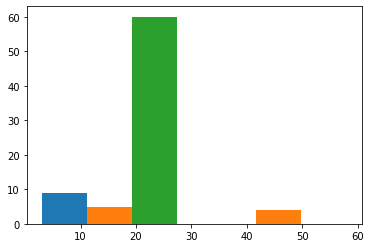

In [ ]:
arr = np.array(['R','R','R','R','R','R','R','L','L','L','R','R','L','L','L','R','R','L','L','L','R','R','R','L','L','L','R','R','R','L','L','L','R','R','R','L','L','L','R','R','R','L','L','L','R','R','L','L','L','L','R','R','L','L','L','L','R','R','L','R','L','L','R','R','L','L','L','L','R','R','L','L','L','R','R','R','R','L','L','L','R','R','R','L','L','L','L','R','R','R','L','L','L','L','R','R','L','L','L','R','R','R','R','L','L','L','L','R','R','R','L','L','L','L','R','R','R','R','L','L','L','R','R','R','L','L','L','L','R','R','R','L','L','L','L','R','R','L','L','L','L','L','R','R','R','L','L','L','L','R','R','R','L','L','L','R','R','R','L','L','L','L','R','R','R','L','L','L','R','R','R','L','L','R','R','R','L','L','L','L','R','R','R','L','R','L','R','R','R','L','L','L','L','R','R','R','L','L','L','R','R','R','L','L','L','R','R','R','L','L','L'])

arr = calFreq(arr)
print(arr)
arr2 = outlier_detector(arr)
print(arr2)
print(statistics.mode(arr2[2]))

plt.hist(arr2, bins = 2)
plt.show()

In [ ]:
#Frequency Calculator Helper Function
def calFreq_old(arr,fps):
    #print(arr)
    arr2 = np.copy(arr)
    time_per_frame = 1/fps    
    next = None
    Time_L_R = 0 
    l = len(arr2)
    accepted = 0 
    for index, obj in enumerate(arr2):
        if index < (l - 1):
            next = arr2[index + 1]
            #print("current" , obj)
            #print("Next : ", next)
            total_frames = int(obj[1])/2+int(next[1])/2
           # print("total_frames : ",total_frames)
            
            if(total_frames*time_per_frame  > 0.1):
                #print("Time Take from left to right : ",total_frames*time_per_frame)
                Time_L_R = Time_L_R + total_frames*time_per_frame
                accepted += 1
    print("\nTotal number of times movement from one end to other : ", l-1)
    print("\nAccepted sweeps for calculation : ", accepted)            
    if (accepted > 0):
      print("\nAverage Time taken from one end to other : ", Time_L_R/(accepted))  
    return l-1,Time_L_R/(l-1)


# Module 6 - Jaw Movement Tracking



In [ ]:
def jawTrack(Filename,threshold,thresh_iterations, visual_area, disp): 
  print("Input File used : ", Filename)  
  cam = cv2.VideoCapture(Filename)

  # Find OpenCV version
  (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

  if int(major_ver)  < 3 :
      fps = cam.get(cv2.cv.CV_CAP_PROP_FPS)
      print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
  else :
      fps = cam.get(cv2.CAP_PROP_FPS)
      print ("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
      
  (ret, prev) = cam.read()
  height, width, channels = prev.shape
  prev = prev[int(height*.75):height, 0:width] 
  prevgray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
  rows = prevgray.shape[0]
  columns = prevgray.shape[1]

  show_hsv = True
  show_glitch = False
  cur_glitch = prev.copy()
  arr = np.array(['R'])

  c = 0
  while True:
      (ret, img) = cam.read()
      #vis = img.copy()
      
      if (ret == False): break
      height, width, channels = img.shape
      img = img[int(height*.75):height, 0:width] 
      #plt.imshow(img)
      #plt.show()
      #crop_img = img[y:y+h, x:x+w]
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      flow = cv2.calcOpticalFlowFarneback(prevgray,gray,None,0.5,5,15,1,5,1.1,cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
      #print(flow)
      prevgray = gray
      if (disp == True): 
        cv2.imshow('flow', draw_flow(gray, flow))
      if show_hsv:
          gray1 = cv2.cvtColor(draw_hsv(flow), cv2.COLOR_BGR2GRAY)
          thresh = cv2.threshold(gray1, threshold, 0xFF,
                                cv2.THRESH_BINARY)[1]
          thresh = cv2.dilate(thresh, None, iterations=thresh_iterations)
          
          if (disp == True): 
            cv2.imshow('thresh', thresh)

          thresh = thresh/255
          if(c==0):
              #cv2.imshow('Box', thresh)
              h = thresh.shape[0]
              w = thresh.shape[1]
              
              # loop over the image, pixel by pixel
              for y in range(0, w):
                  for x in range(0, h):
                      # threshold the pixel
                      #image[y, x] = 255 if image[y, x] >= T else 0
                      if (thresh[x, y] > 0): 
                          #print (x,y) 
                          break
              c = 1 
              cv2.waitKey(10)
          left = thresh[:,:int(columns/2)-visual_area]
          right = thresh[:,int(columns/2)+visual_area:columns] 
          l = left.flatten().sum(axis=0)
          r = right.flatten().sum(axis=0)
          if(ret == False):
              break
          
          if (r>l):
              arr = np.append(arr,"R")
              #print("Right")
          elif (l>r):
              arr = np.append(arr,"L")
              #print("Left")
          else:
              #arr = np.append(arr,arr[-1])
              print()
          #cnts, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cam.release()
  cv2.destroyAllWindows()

  #print(arr)
  arr_orig,arr2,err_r,err_l,frames_r,frames_l = errorDetector(arr)
  print(err_l,"   ",err_r)
  print("Duration of tongue in Right extra : ",frames_r*(1/fps)," seconds")
  print("Duration of tongue in Left extra : ",frames_l*(1/fps)," seconds")
  #print(arr2)

  frequncy,TimeTaken = calFreq(arr_orig,fps)
  
  return frequncy,TimeTaken

In [ ]:
jawTrack('5a_FaceDetector.mp4', 30, 2, 0, False)

Input File used :  5a_FaceDetector.mp4
Frames per second using video.get(cv2.CAP_PROP_FPS) : 0.0


AttributeError: ignored

# **Main**

In [ ]:
def main():
    #Global Variable Declaration
    SMOOTHING_RADIUS=50
    Height_Vid = 1200
    Width_Vid = 800
    visual_area = 0 #
    correctionFactor_Face = 30
    correctionFactor_Lip = 30
    threshold = 40
    thresh_iterations = 2
    disp = True 
    save_in_excel = False 
    time_slice = 5
    try:
        import google.colab
        IN_COLAB = True
    except:
        IN_COLAB = False
    if (IN_COLAB == True):
        print('Running on CoLab')
        drive.mount('/content/drive')
        os.chdir('/content/drive/My Drive/WORK/Work_OVGU_IKND/Codes/CurrentImplementation/Videos/NewSet_2')

        #Change it to True if you want Stabilization
        Stabilize = False

        #Change it to True if you want Video to be compressed
        Video_Compression = False

        #Change it to True if you want Face Extraction
        Face_Extract = False

        #Change it to True if you want Tongue Extraction
        Lip_Extraction = False

        #Change it to True if you want to calculate the frequency
        Frquency_Calculation = True
        
        #Change it to True if you want to run on All files
        Multi_mode = False

        MainFile = "Patient102a.mov" #Change When needed
        if (Multi_mode == True) :
          #for file_name in glob.iglob('*.mov', recursive=True):
          for file_name in sorted(glob.iglob('*.mov')):
            if ("_Stabilized" in file_name) or ("_Compressed" in file_name) or ("_FaceDetector" in file_name) or ("_LipDetector" in file_name):
              print()
            else: 
              print("\n ################################################################# \n")
              print("Working on File Name : ", file_name)
              print("Processing Starts")
              MainFile = file_name
              CUI(MainFile,Stabilize,Video_Compression,Face_Extract,Lip_Extraction,Frquency_Calculation,
                                                                                        SMOOTHING_RADIUS,
                                                                                        threshold,thresh_iterations,
                                                                                        visual_area,disp,
                                                                                        correctionFactor_Face,
                                                                                        correctionFactor_Lip,
                                                                                        save_in_excel,
                                                                                        time_slice)
              print("Processing Ends")
              print("\n ################################################################# \n")
        else:           
           CUI(MainFile,Stabilize,Video_Compression,Face_Extract,Lip_Extraction,Frquency_Calculation,
                                                                                        SMOOTHING_RADIUS,
                                                                                        threshold,thresh_iterations,
                                                                                        visual_area,disp,
                                                                                        correctionFactor_Face,
                                                                                        correctionFactor_Lip,
                                                                                        save_in_excel,
                                                                                        time_slice)
    else:
        print('Running on Local System')
        GUI(MainFile,SMOOTHING_RADIUS,threshold,thresh_iterations,visual_area,disp,correctionFactor_Face,correctionFactor_Lip)


In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/WORK/Work_OVGU_IKND/Codes/CurrentImplementation/Videos/NewSet_2')
model = load_model("../../final_model.h5",compile=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def plot(arr):
  #x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,26,27,28,29,30] 
  x = np.arange(1, len(arr)+1, 1)
  y = arr
  plt.scatter(x, y, label= "Sweep duration", color= "green",  
            marker= "*", s=20) 
  # x-axis label 
  plt.xlabel('Sweep Number') 
  # frequency label 
  plt.ylabel('Number of Frames') 
  # plot title 
  plt.title('Sweep Durations') 
  # showing legend 
  plt.legend() 
    
  # function to show the plot 
  plt.show() 

Running on CoLab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Stabilization = False,Video_Compression = False,Face_Extraction = False,Lip_Extraction = False,Frquency_Calculation = True


###############Frequency Calculation####################

Using Lip Segmentation Model
Input File used :  Patient102a_LipDetector.mp4
Video Duration:  26
Start time:      10.5
End time:        15.5

[MoviePy] Running:
>>> /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1 -y -i Patient102a_LipDetector.mp4 -ss 10.50 -t 5.00 -vcodec copy -acodec copy ../../tmp/tmp.mp4
... command successful.
Right R: 2303  L: 1773   Difference: 530   Previous direction: R


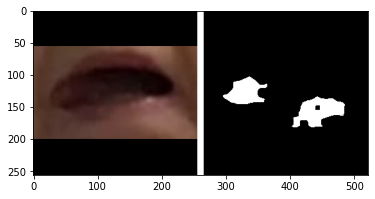

Right R: 2107  L: 590   Difference: 1517   Previous direction: R


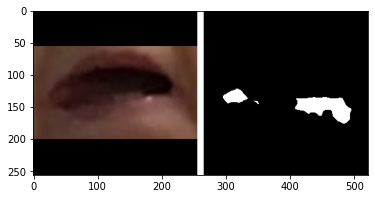

Left R: 187  L: 533   Difference: 346   Previous direction: R


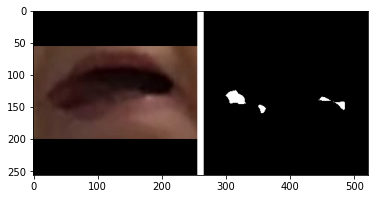

Right R: 491  L: 456   Difference: 35   Previous direction: L


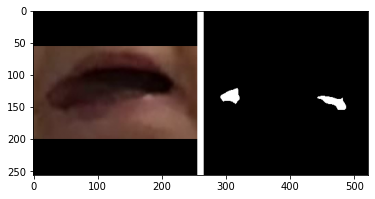

Right R: 1014  L: 849   Difference: 165   Previous direction: R


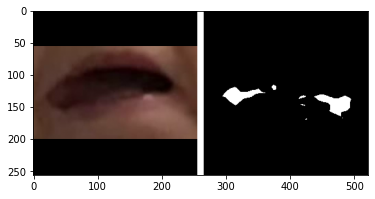

Left R: 683  L: 686   Difference: 3   Previous direction: R


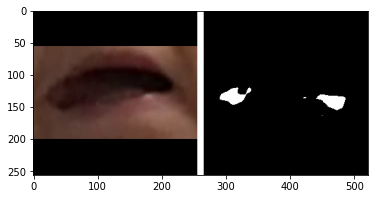

Right R: 1481  L: 953   Difference: 528   Previous direction: L


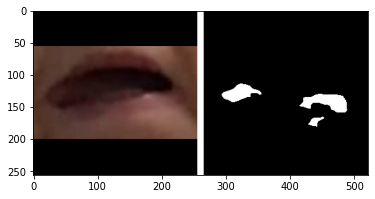

Right R: 919  L: 589   Difference: 330   Previous direction: R


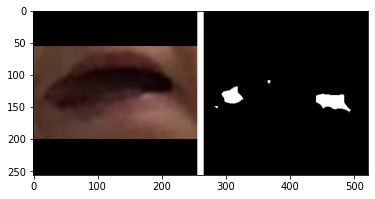

Left R: 300  L: 726   Difference: 426   Previous direction: R


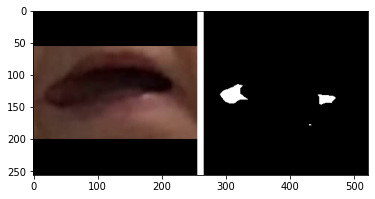

Right R: 2187  L: 433   Difference: 1754   Previous direction: L


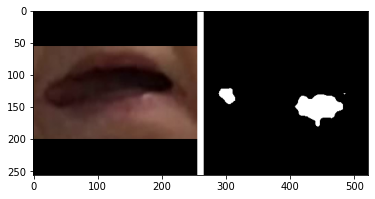

Left R: 74  L: 640   Difference: 566   Previous direction: R


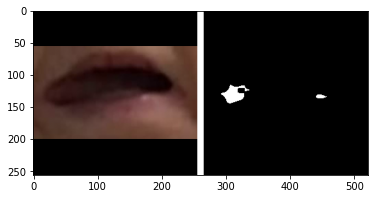

Left R: 133  L: 995   Difference: 862   Previous direction: L


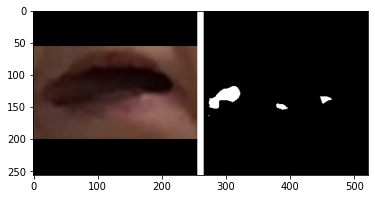

Left R: 108  L: 1006   Difference: 898   Previous direction: L


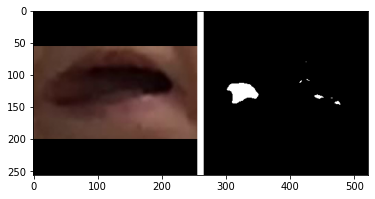

Right R: 1636  L: 472   Difference: 1164   Previous direction: L


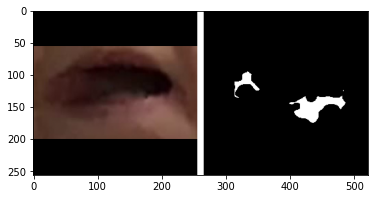

Left R: 65  L: 1725   Difference: 1660   Previous direction: R


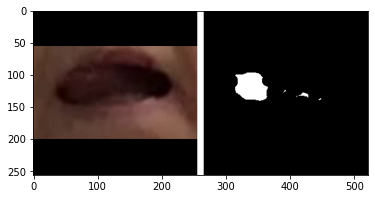

Left R: 707  L: 1547   Difference: 840   Previous direction: L


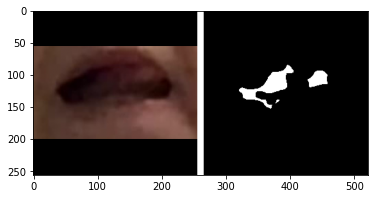

Right R: 1705  L: 351   Difference: 1354   Previous direction: L


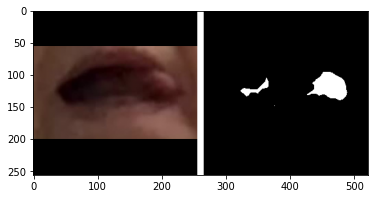

Right R: 1425  L: 425   Difference: 1000   Previous direction: R


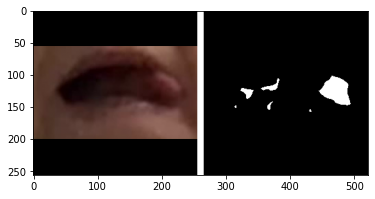

Right R: 1218  L: 247   Difference: 971   Previous direction: R


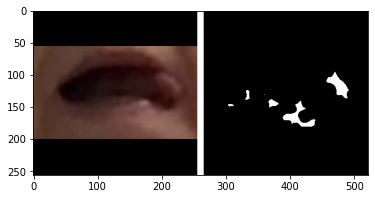

Left R: 48  L: 292   Difference: 244   Previous direction: R


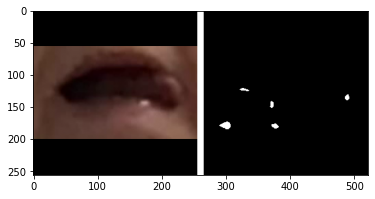

Right R: 1191  L: 69   Difference: 1122   Previous direction: L


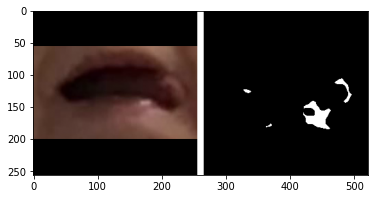

Left R: 105  L: 593   Difference: 488   Previous direction: R


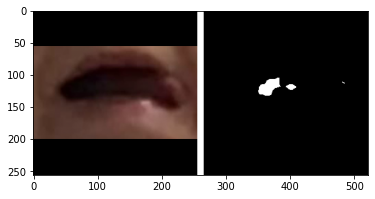

Right R: 1033  L: 604   Difference: 429   Previous direction: L


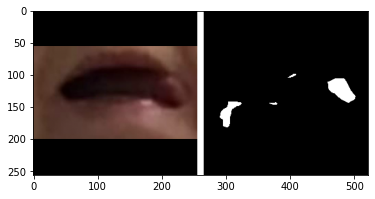

Right R: 827  L: 16   Difference: 811   Previous direction: R


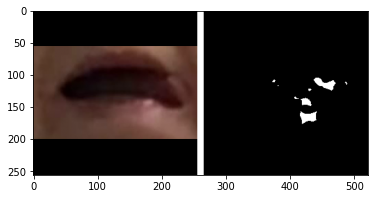

Right R: 284  L: 23   Difference: 261   Previous direction: R


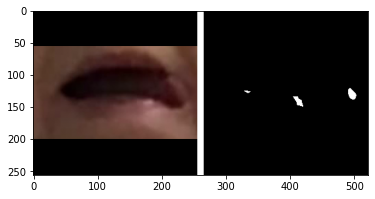

Right R: 152  L: 61   Difference: 91   Previous direction: R


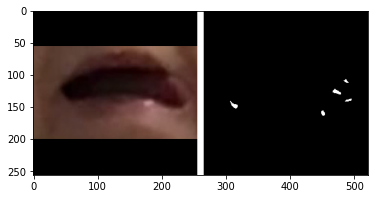

Right R: 1597  L: 5   Difference: 1592   Previous direction: R


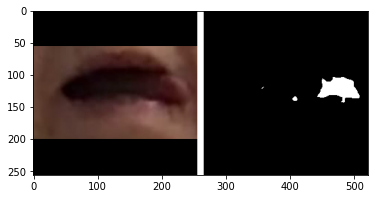

Right R: 2787  L: 97   Difference: 2690   Previous direction: R


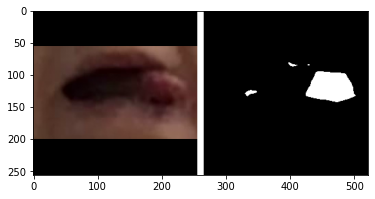

Right R: 3101  L: 201   Difference: 2900   Previous direction: R


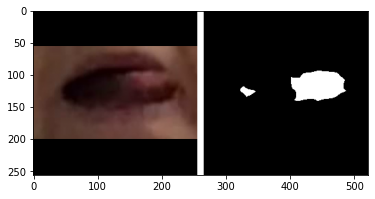

Left R: 1723  L: 2097   Difference: 374   Previous direction: R


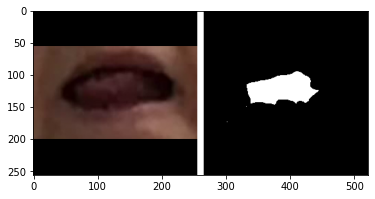

Left R: 0  L: 2383   Difference: 2383   Previous direction: L


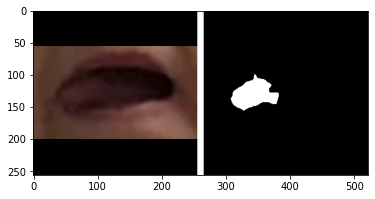

Left R: 101  L: 2506   Difference: 2405   Previous direction: L


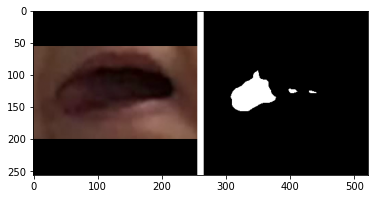

Left R: 936  L: 1865   Difference: 929   Previous direction: L


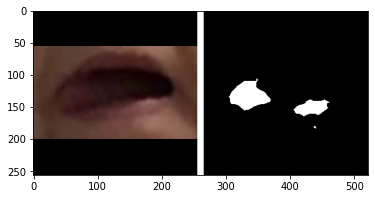

Left R: 1179  L: 1608   Difference: 429   Previous direction: L


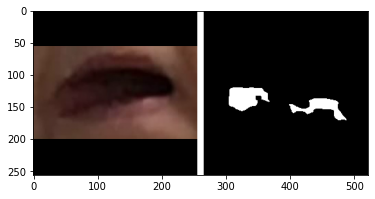

Left R: 354  L: 2002   Difference: 1648   Previous direction: L


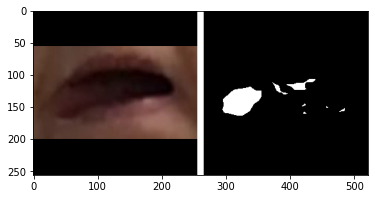

Right R: 2804  L: 2069   Difference: 735   Previous direction: L


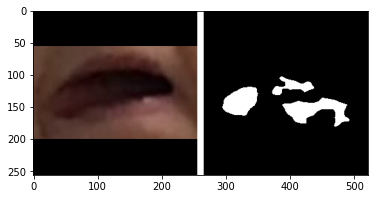

Left R: 877  L: 2204   Difference: 1327   Previous direction: R


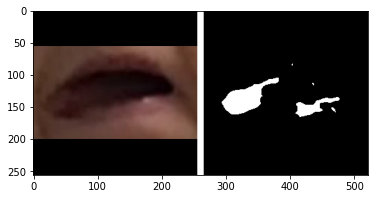

Left R: 516  L: 1590   Difference: 1074   Previous direction: L


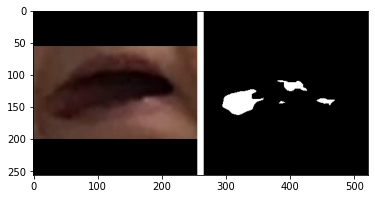

Left R: 556  L: 1492   Difference: 936   Previous direction: L


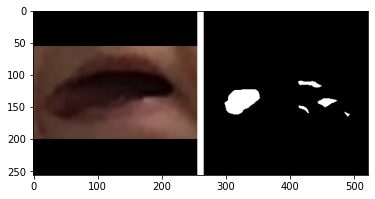

Left R: 295  L: 2110   Difference: 1815   Previous direction: L


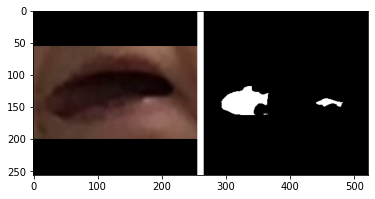

Left R: 464  L: 1670   Difference: 1206   Previous direction: L


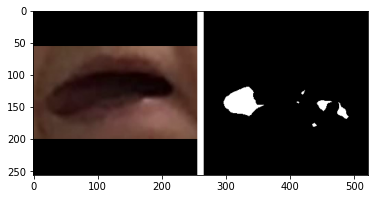

Left R: 633  L: 1842   Difference: 1209   Previous direction: L


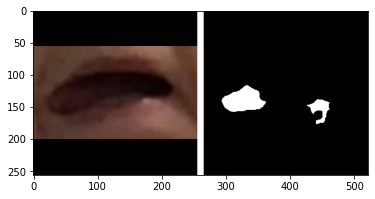

Right R: 2598  L: 1822   Difference: 776   Previous direction: L


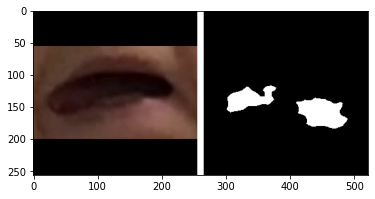

Left R: 517  L: 1933   Difference: 1416   Previous direction: R


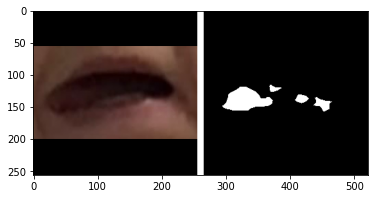

Right R: 2121  L: 514   Difference: 1607   Previous direction: L


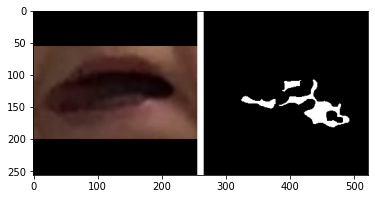

Left R: 45  L: 64   Difference: 19   Previous direction: R


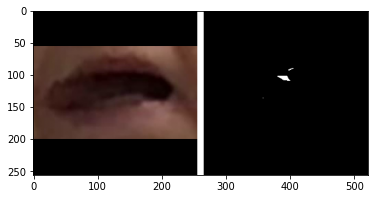

Right R: 135  L: 0   Difference: 135   Previous direction: L


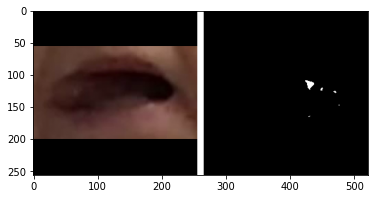

Left R: 10  L: 2452   Difference: 2442   Previous direction: R


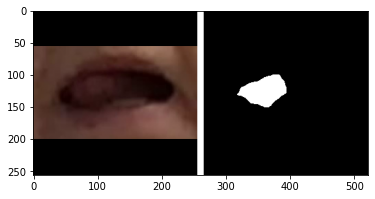

Left R: 1067  L: 1286   Difference: 219   Previous direction: L


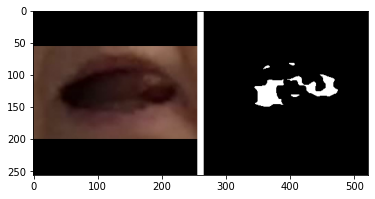

Right R: 1320  L: 1073   Difference: 247   Previous direction: L


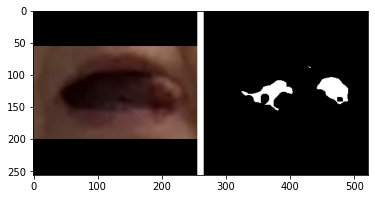

Right R: 2298  L: 789   Difference: 1509   Previous direction: R


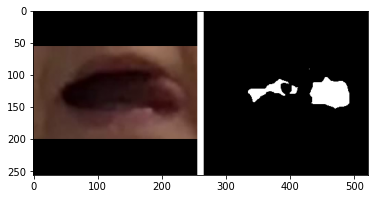

Right R: 1347  L: 275   Difference: 1072   Previous direction: R


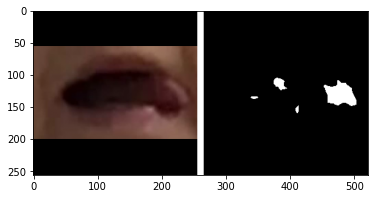

Right R: 1422  L: 100   Difference: 1322   Previous direction: R


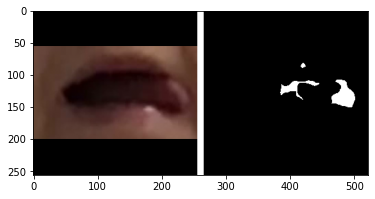

Right R: 994  L: 0   Difference: 994   Previous direction: R


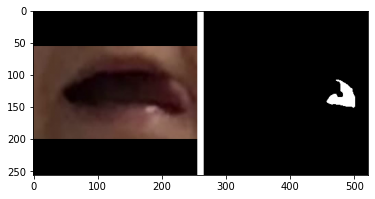

Right R: 970  L: 0   Difference: 970   Previous direction: R


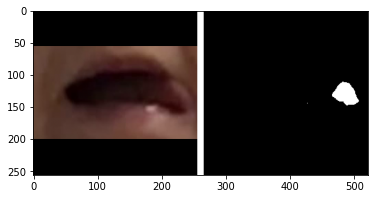

Right R: 505  L: 31   Difference: 474   Previous direction: R


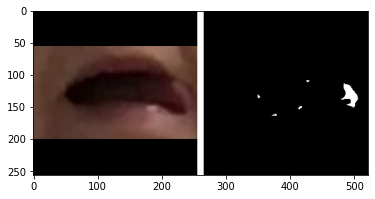

Right R: 1966  L: 756   Difference: 1210   Previous direction: R


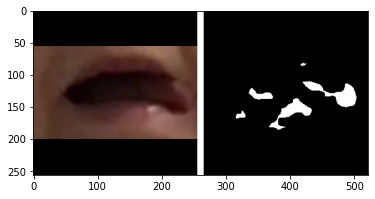

Left R: 849  L: 1589   Difference: 740   Previous direction: R


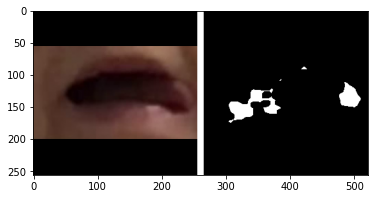

Right R: 777  L: 451   Difference: 326   Previous direction: L


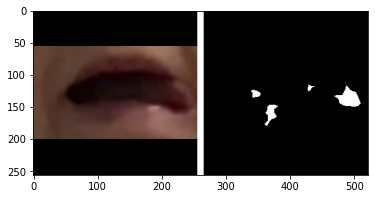

Left R: 366  L: 435   Difference: 69   Previous direction: R


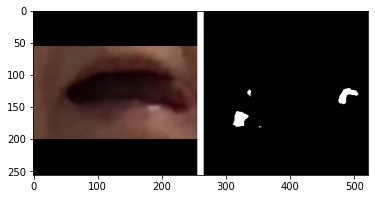

Right R: 1114  L: 98   Difference: 1016   Previous direction: L


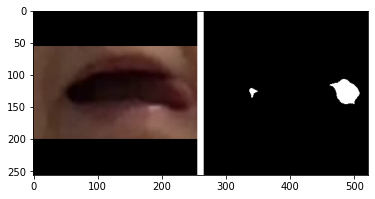

Right R: 2141  L: 550   Difference: 1591   Previous direction: R


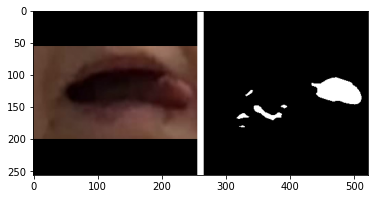

Right R: 2216  L: 1414   Difference: 802   Previous direction: R


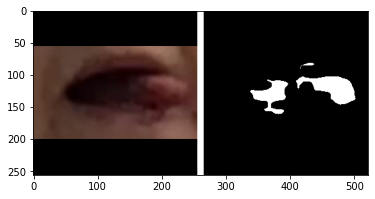

Right R: 2820  L: 486   Difference: 2334   Previous direction: R


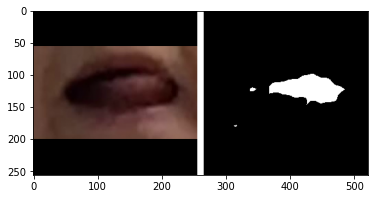

Left R: 266  L: 1750   Difference: 1484   Previous direction: R


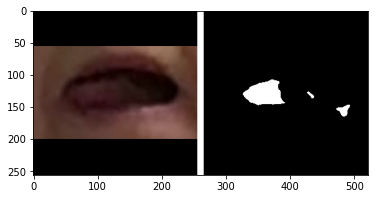

Left R: 1117  L: 1955   Difference: 838   Previous direction: L


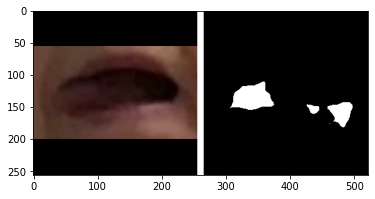

Left R: 8  L: 1778   Difference: 1770   Previous direction: L


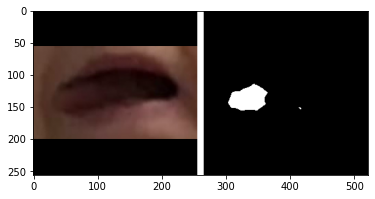

Left R: 789  L: 1195   Difference: 406   Previous direction: L


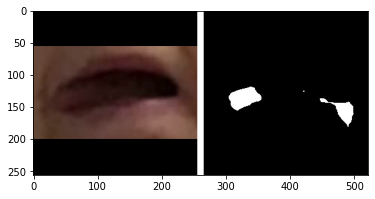

Left R: 760  L: 1097   Difference: 337   Previous direction: L


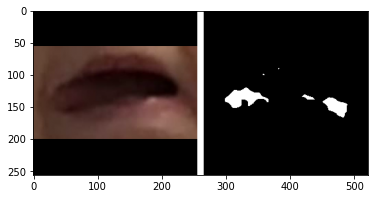

Left R: 278  L: 1272   Difference: 994   Previous direction: L


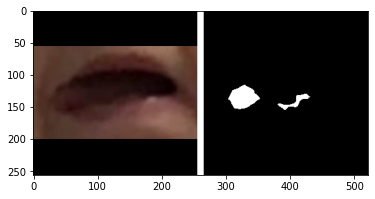

Right R: 739  L: 629   Difference: 110   Previous direction: L


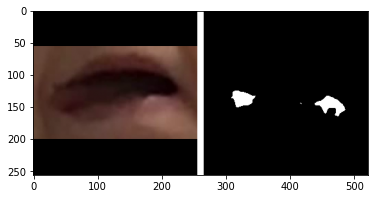

Left R: 484  L: 1204   Difference: 720   Previous direction: R


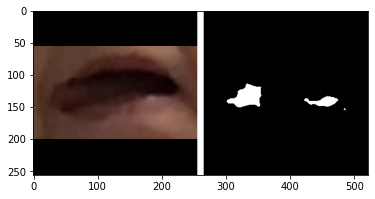

Left R: 434  L: 1346   Difference: 912   Previous direction: L


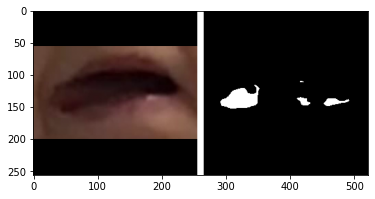

Left R: 980  L: 2239   Difference: 1259   Previous direction: L


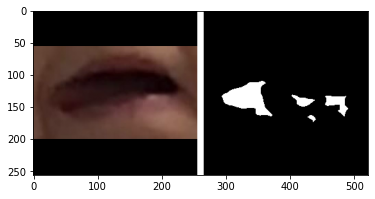

Left R: 945  L: 1998   Difference: 1053   Previous direction: L


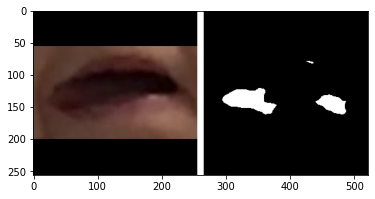

Right R: 1616  L: 1534   Difference: 82   Previous direction: L


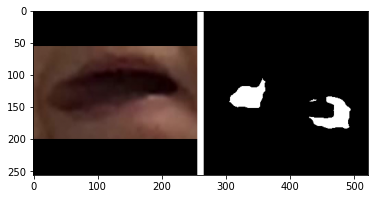

Left R: 396  L: 590   Difference: 194   Previous direction: R


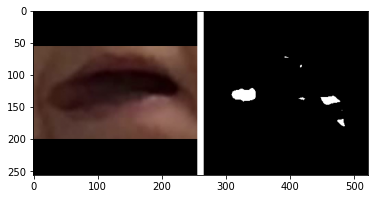

Right R: 996  L: 700   Difference: 296   Previous direction: L


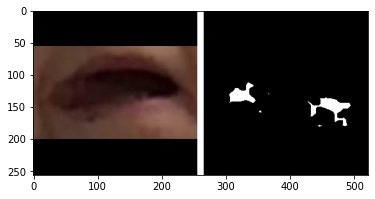

Left R: 441  L: 1498   Difference: 1057   Previous direction: R


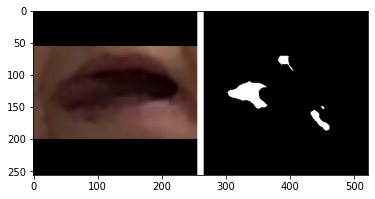

Right R: 857  L: 765   Difference: 92   Previous direction: L


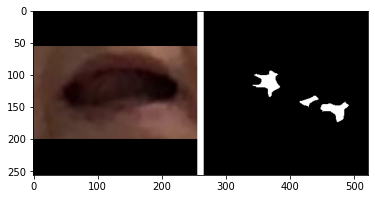

Right R: 3040  L: 0   Difference: 3040   Previous direction: R


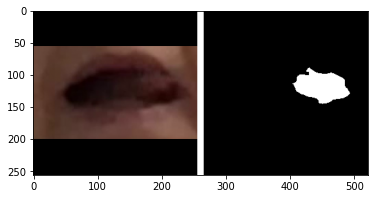

Right R: 1261  L: 22   Difference: 1239   Previous direction: R


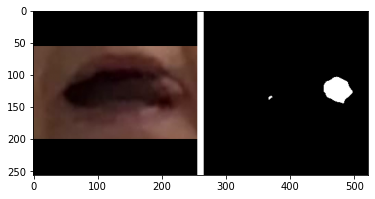

Right R: 695  L: 35   Difference: 660   Previous direction: R


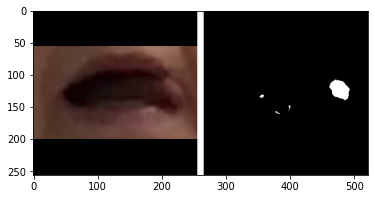

Right R: 877  L: 133   Difference: 744   Previous direction: R


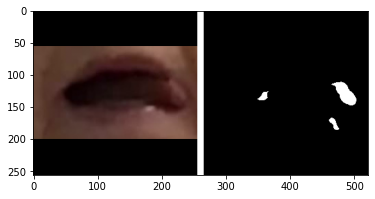

Right R: 1318  L: 0   Difference: 1318   Previous direction: R


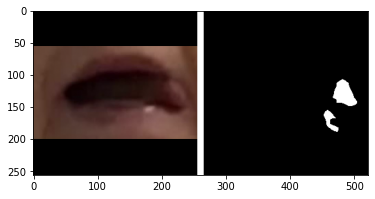

Right R: 560  L: 320   Difference: 240   Previous direction: R


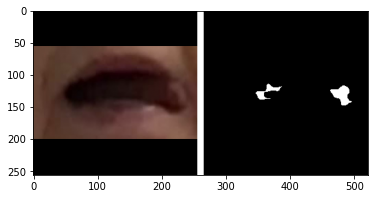

Right R: 408  L: 228   Difference: 180   Previous direction: R


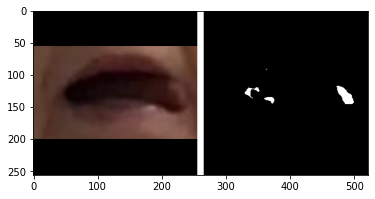

Right R: 1248  L: 34   Difference: 1214   Previous direction: R


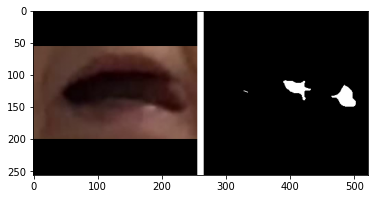

Right R: 656  L: 0   Difference: 656   Previous direction: R


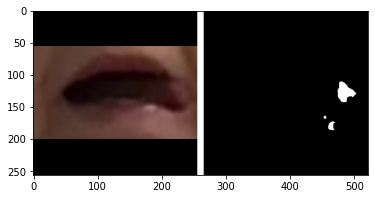

Right R: 883  L: 108   Difference: 775   Previous direction: R


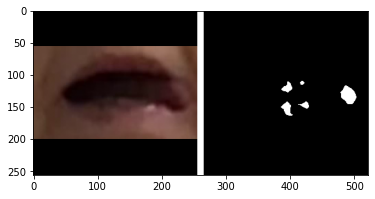

Right R: 1213  L: 105   Difference: 1108   Previous direction: R


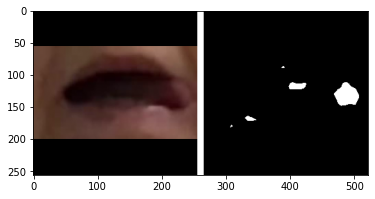

Right R: 1679  L: 99   Difference: 1580   Previous direction: R


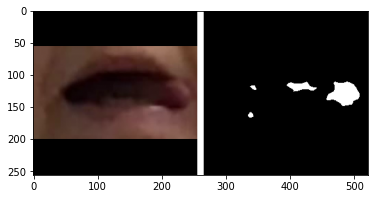

Right R: 1759  L: 162   Difference: 1597   Previous direction: R


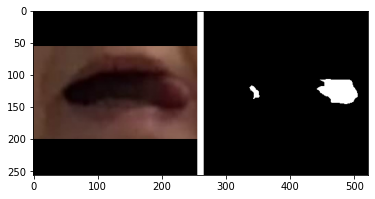

Right R: 1893  L: 731   Difference: 1162   Previous direction: R


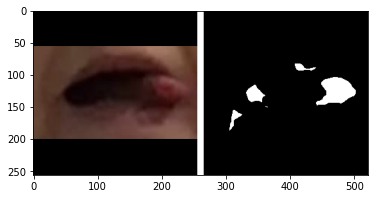

Right R: 2812  L: 669   Difference: 2143   Previous direction: R


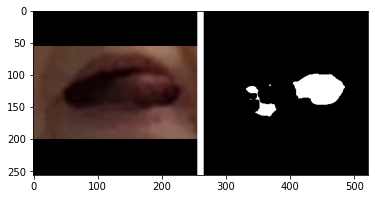

Right R: 1676  L: 1402   Difference: 274   Previous direction: R


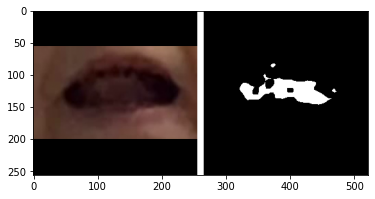

Left R: 108  L: 1401   Difference: 1293   Previous direction: R


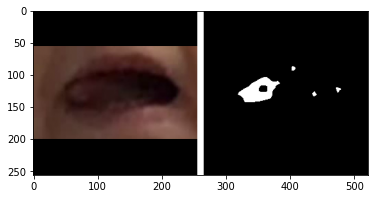

Left R: 112  L: 234   Difference: 122   Previous direction: L


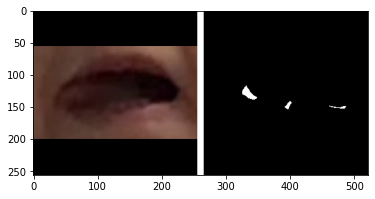

Left R: 846  L: 927   Difference: 81   Previous direction: L


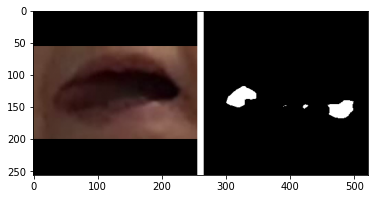

Right R: 2525  L: 241   Difference: 2284   Previous direction: L


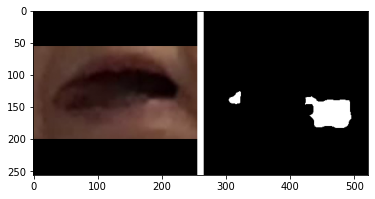

Right R: 875  L: 509   Difference: 366   Previous direction: R


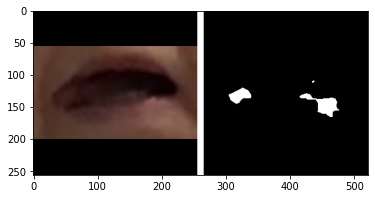

Right R: 2620  L: 835   Difference: 1785   Previous direction: R


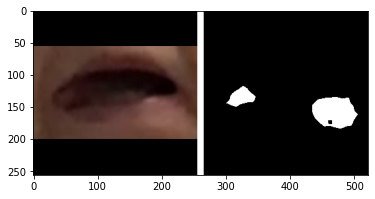

Right R: 1577  L: 755   Difference: 822   Previous direction: R


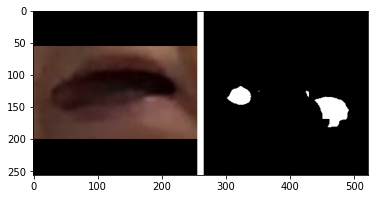

Right R: 679  L: 460   Difference: 219   Previous direction: R


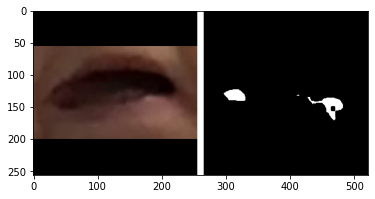

Right R: 3123  L: 216   Difference: 2907   Previous direction: R


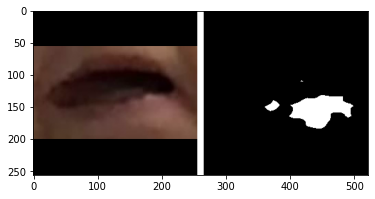

Left R: 618  L: 641   Difference: 23   Previous direction: R


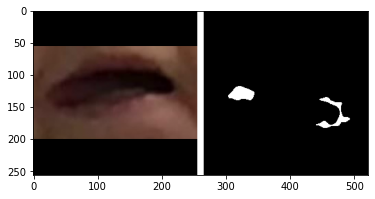

Left R: 468  L: 755   Difference: 287   Previous direction: L


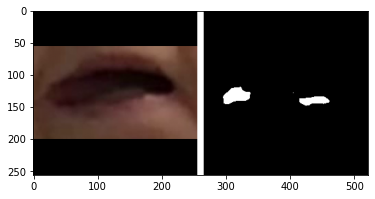

Left R: 117  L: 763   Difference: 646   Previous direction: L


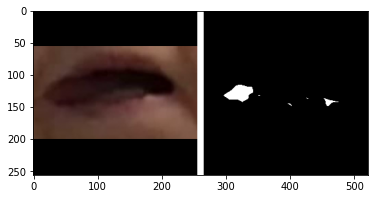

Right R: 1894  L: 345   Difference: 1549   Previous direction: L


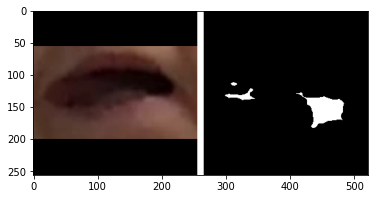

Left R: 0  L: 1102   Difference: 1102   Previous direction: R


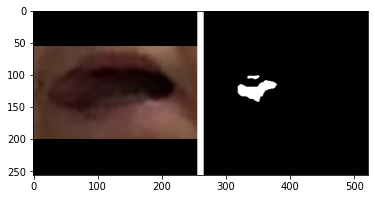

Left R: 20  L: 616   Difference: 596   Previous direction: L


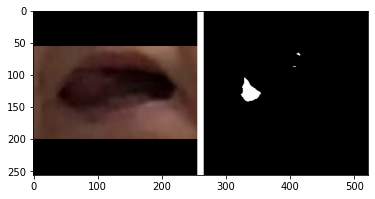

Right R: 1482  L: 587   Difference: 895   Previous direction: L


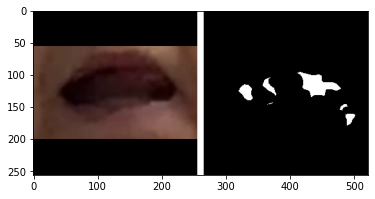

Left R: 1068  L: 1153   Difference: 85   Previous direction: R


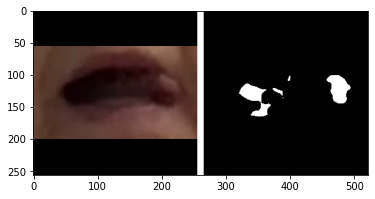

Right R: 1182  L: 405   Difference: 777   Previous direction: L


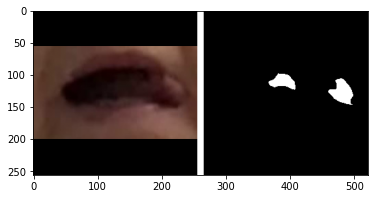

Right R: 848  L: 121   Difference: 727   Previous direction: R


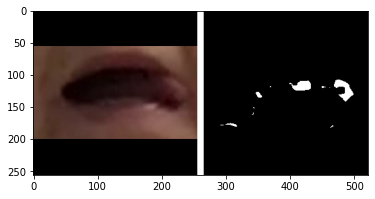

Right R: 832  L: 472   Difference: 360   Previous direction: R


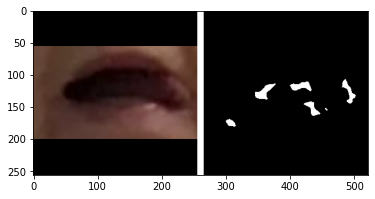

Right R: 1217  L: 113   Difference: 1104   Previous direction: R


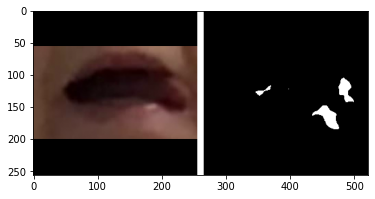

Right R: 646  L: 197   Difference: 449   Previous direction: R


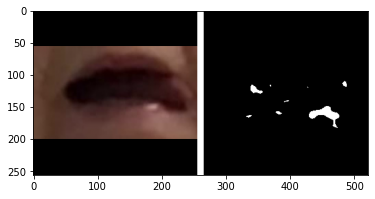

Right R: 533  L: 70   Difference: 463   Previous direction: R


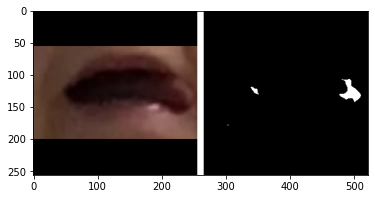

Right R: 1836  L: 219   Difference: 1617   Previous direction: R


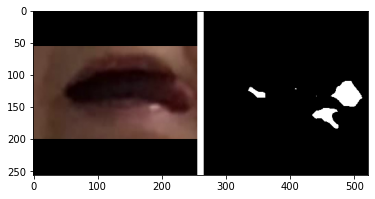

Right R: 855  L: 528   Difference: 327   Previous direction: R


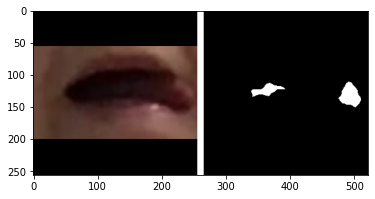

Right R: 1369  L: 211   Difference: 1158   Previous direction: R


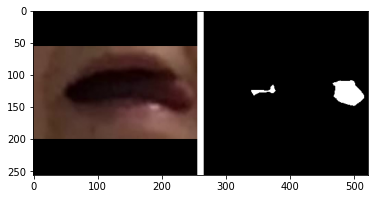

Right R: 1129  L: 132   Difference: 997   Previous direction: R


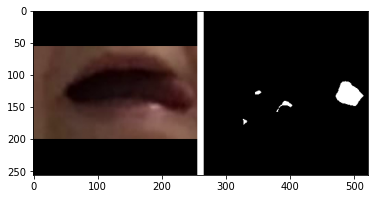

Right R: 1199  L: 16   Difference: 1183   Previous direction: R


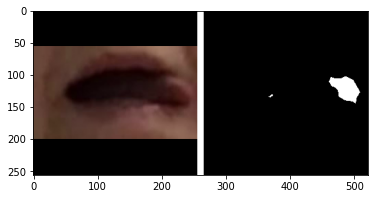

Right R: 2355  L: 498   Difference: 1857   Previous direction: R


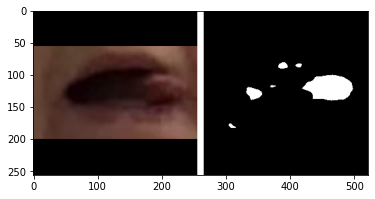

Right R: 2490  L: 1890   Difference: 600   Previous direction: R


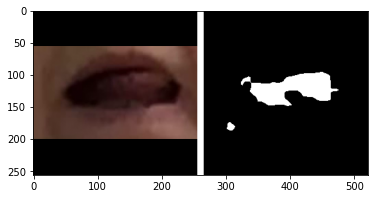

Left R: 66  L: 371   Difference: 305   Previous direction: R


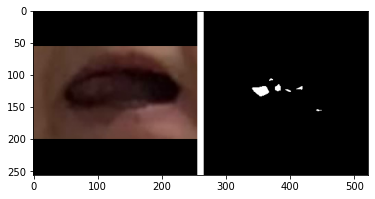

Left R: 379  L: 1238   Difference: 859   Previous direction: L


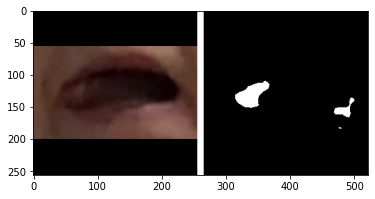

Left R: 485  L: 916   Difference: 431   Previous direction: L


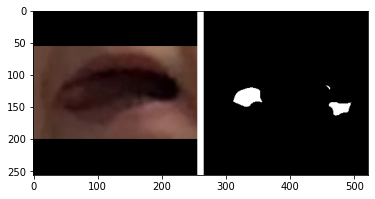

Left R: 119  L: 683   Difference: 564   Previous direction: L


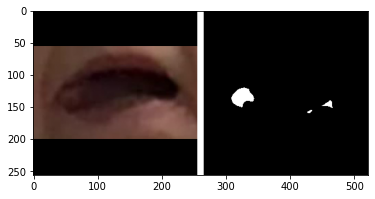

Left R: 940  L: 1156   Difference: 216   Previous direction: L


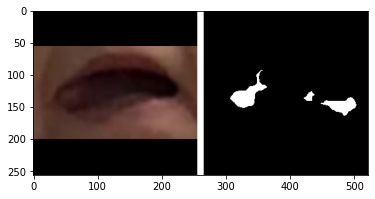

Right R: 973  L: 562   Difference: 411   Previous direction: L


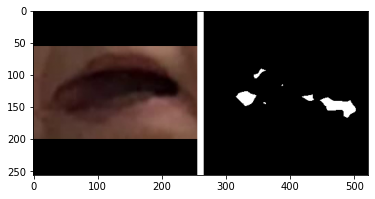

Left R: 1338  L: 1674   Difference: 336   Previous direction: R


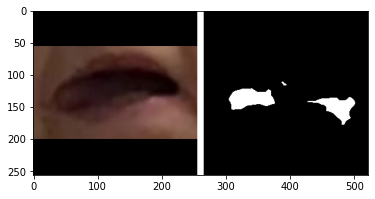

Right R: 1426  L: 620   Difference: 806   Previous direction: L


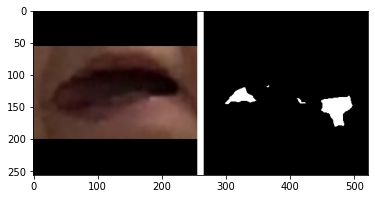

Right R: 1623  L: 1339   Difference: 284   Previous direction: R


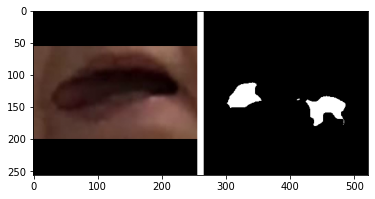

Right R: 1626  L: 0   Difference: 1626   Previous direction: R


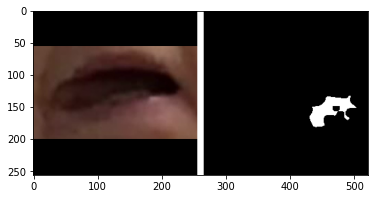

Right R: 615  L: 382   Difference: 233   Previous direction: R


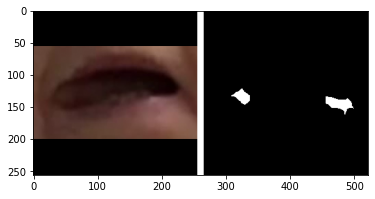

Left R: 103  L: 249   Difference: 146   Previous direction: R


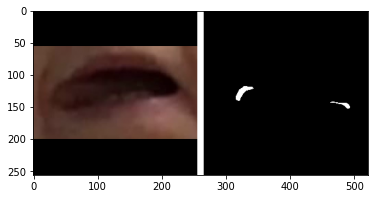

Left R: 186  L: 889   Difference: 703   Previous direction: L


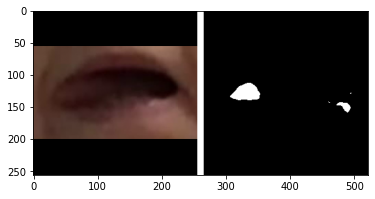

Left R: 482  L: 1381   Difference: 899   Previous direction: L


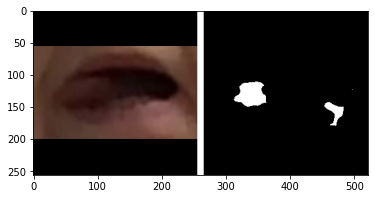

Left R: 191  L: 667   Difference: 476   Previous direction: L


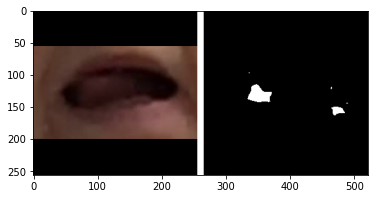

Right R: 2940  L: 465   Difference: 2475   Previous direction: L


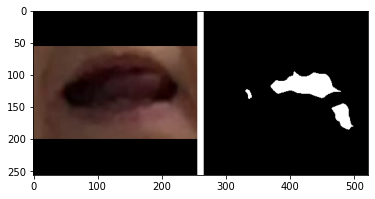

Right R: 1959  L: 685   Difference: 1274   Previous direction: R


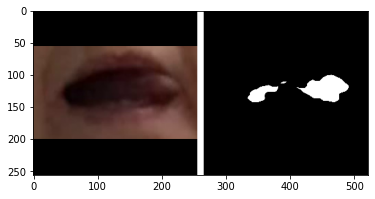

Right R: 1983  L: 1192   Difference: 791   Previous direction: R


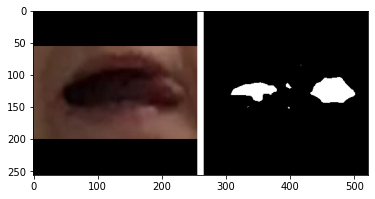

Right R: 943  L: 194   Difference: 749   Previous direction: R


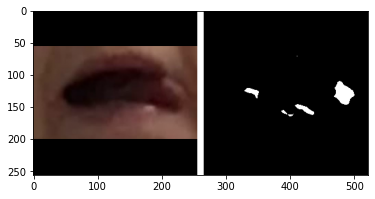

Right R: 884  L: 9   Difference: 875   Previous direction: R


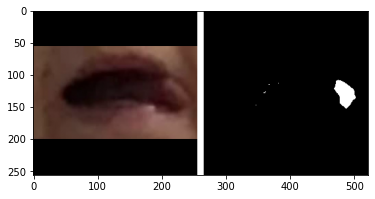

Right R: 531  L: 167   Difference: 364   Previous direction: R


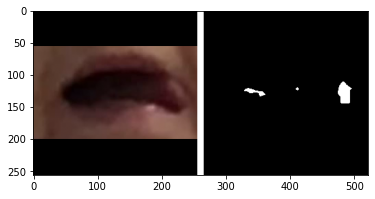

Right R: 621  L: 256   Difference: 365   Previous direction: R


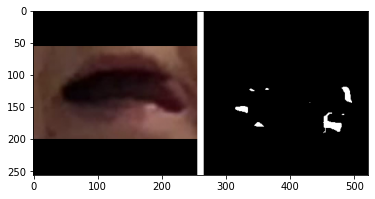

Right R: 887  L: 427   Difference: 460   Previous direction: R


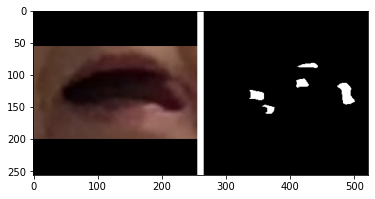

Left R: 554  L: 949   Difference: 395   Previous direction: R


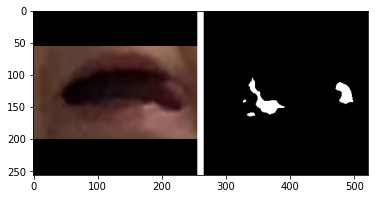

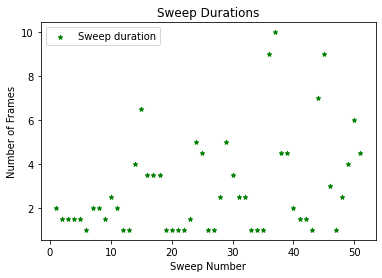


#####################################
Total number of sweeps:  51
Detecting outliers.......
Lower Bound:  -3.5
Upper Bound:  8.5
Number of outliers:  3
Accepted Sweeps:     48
Outliers detected at:
Sweep Location:  35     Sweep Duration:  9.0
Sweep Location:  36     Sweep Duration:  10.0
Sweep Location:  44     Sweep Duration:  9.0
Mode:  1.0
Mean:  2.9215686274509802
SD  :  2.2723832181645944
#########################################

#############Frequency Calcualtion Ends###############



In [ ]:
if __name__ == "__main__":
    main()

# Testing

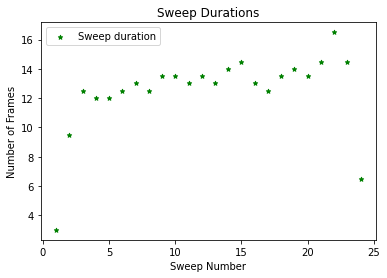

In [ ]:
arr = [3.0, 9.5, 12.5, 12.0, 12.0, 12.5, 13.0, 12.5, 13.5, 13.5, 13.0, 13.5, 13.0, 14.0, 14.5, 13.0, 12.5, 13.5, 14.0, 13.5, 14.5, 16.5, 14.5, 6.5]
plot(arr)
#len(arr)

In [ ]:
def convert(seconds):
    hours = seconds // 3600
    seconds %= 3600
    mins = seconds // 60
    seconds %= 60
    return hours, mins, seconds
video = moviepy.editor.VideoFileClip("1a.mov")
# Contains the duration of the video in terms of seconds
video_duration = int(video.duration)
hours, mins, secs = convert(video_duration)
print(video_duration)
print("Hours:", hours)
print("Minutes:", mins)
print("Seconds:", secs)

11
Hours: 0
Minutes: 0
Seconds: 11
Start 3.0
End 8.0


In [ ]:
import numpy as np
#import pandas as pd
dataset= [50,10,12,12, 13,12,11,14,13,15,10,10, 10, 100,12, 14,13, 12,10, 10,11,12,15,12,13,12,11,14,13,15,10, 15,12,10,14,13,15,10,90,20]

In [ ]:
len(dataset)

40

In [ ]:
def detect_outlier(data_1,thresh):
    outliers=[]
    threshold=thresh
    mean_1 = np.mean(data_1)
    std_1 = np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
outlier_datapoints = detect_outlier(dataset)
print(outlier_datapoints)

TypeError: ignored

In [ ]:
def outlier_detector(data_1):
  dataset = data_1
  dataset = sorted(dataset)
  q1, q3= np.percentile(dataset,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  print(lower_bound,upper_bound)
  outliers=[]
  index=[]
  array=[]
  for i,y in enumerate(data_1):
        if (y > upper_bound):
          outliers.append(y)
          index.append(i)
        elif (y < lower_bound):
          outliers.append(y)
        else:
          array.append(y)
  return outliers,index,array

In [ ]:
outlier_detector(dataset)